Import stuff

In [4]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
# plt.style.use('seaborn-whitegrid')
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

## Uncomment for nicer plots ##
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Call an instance of the extented HANC model (Maybe rename the model class at some point)

In [5]:
model = HANCModelClass(name='model')

Print to see whatever is in 'model'

In [6]:
print(model)

Modelclass: HANCModelClass
Name: model

namespaces: ['ini', 'ss', 'path', 'sim', 'sol', 'par']
other_attrs: ['par', 'ini', 'ss', 'path', 'sim', 'grids_hh', 'pols_hh', 'inputs_hh', 'inputs_hh_z', 'outputs_hh', 'intertemps_hh', 'shocks', 'unknowns', 'targets', 'varlist', 'jac', 'H_U', 'H_Z', 'jac_hh', 'IRF']
savefolder: saved
cpp_filename: None

ini:
 Dz = ndarray with shape = (2, 10) [dtype: float64]
 Dbeg = ndarray with shape = (2, 10, 500) [dtype: float64]
 Y = nan [float]
 C = nan [float]
 I = nan [float]
 Gamma = nan [float]
 K = nan [float]
 L = nan [float]
 G = nan [float]
 B = nan [float]
 rk = nan [float]
 w = nan [float]
 r = nan [float]
 r_b = nan [float]
 A_hh = nan [float]
 C_hh = nan [float]
 clearing_A = nan [float]
 clearing_C = nan [float]
 clearing_L = nan [float]
 ELL_hh = nan [float]
 L_hh = nan [float]
 memory, gb: 0.0

ss:
 a = ndarray with shape = (2, 10, 500) [dtype: float64]
 c = ndarray with shape = (2, 10, 500) [dtype: float64]
 ell = ndarray with shape = (2, 1

Find the initial steady state. Write parameter values used (at least for the ones at vary later).
**This takes a few seconds**

In [7]:
model.find_ss(do_print=True)

it
it
it
it
it
it
it
it
it
it
it
it
it
it
Solver terminated
it

Steady state aggregates:
 K_ss =   3.4153
 L_ss =   1.0118
 Y_ss =   1.4575
 G_ss =   0.3000
 B_ss =   0.6204
 I_ss =   0.3415
 C_ss =   0.8160

steady state prices:
 w_ss =   1.0083
 r_ss =   0.0280

Check for market clearing:
Excess savings           = -0.0000
Exess consumption demand = -0.0000
Excess labour supply     =  0.0000


### Illustrate HH behavior

Extract model compontents for faster access

In [8]:
par = model.par
ss = model.ss

Plot the cdf and density of assets

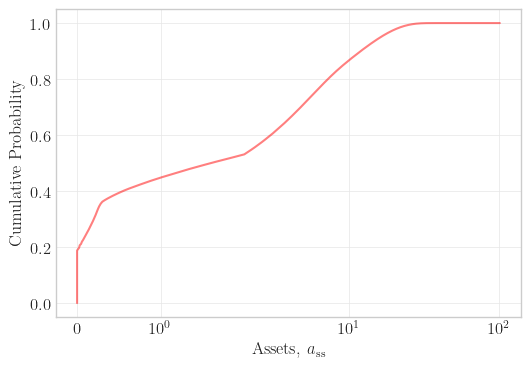

In [38]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete', color = 'red', alpha = .5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('Assets, $a_{\mathrm{ss}}$')
ax.set_ylabel('Cumulative Probability')
ax.set_xscale('symlog')

plt.savefig('figs/cdf.pdf')

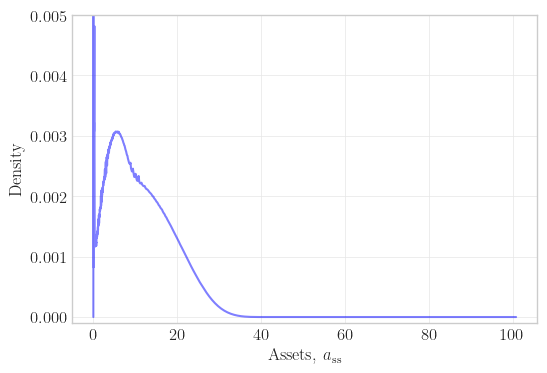

In [36]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.sum(ss.D,axis=(0,1)),0,0.0),label='discrete', color = 'blue', alpha = .5)

ax.set_ylim(-0.0001,0.005)
ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')


ax.set_xlabel('Assets, $a_{\mathrm{ss}}$')
ax.set_ylabel('Density')

plt.savefig('figs/dens.pdf')

Plot the household policy functions

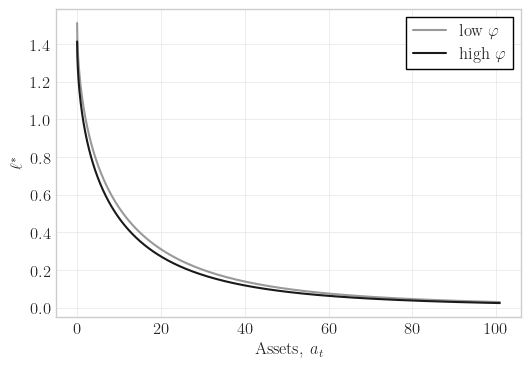

In [47]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,ss.ell[0,1,:], color = '0.6', label = r'low $\varphi$')
ax.plot(par.a_grid,ss.ell[1,1,:], color = '0.1', label = r'high $\varphi$')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('Assets, $a_t$')
ax.set_ylabel(r'$\ell^\ast$')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('figs/ell_pols.pdf')

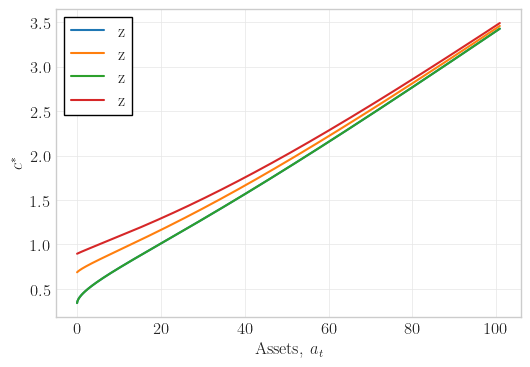

In [49]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid, ss.c[0,0,:], label = 'z')
ax.plot(par.a_grid, ss.c[0,2,:], label = 'z')
ax.plot(par.a_grid, ss.c[0,0,:], label = 'z')
ax.plot(par.a_grid, ss.c[0,3,:], label = 'z')


ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')


ax.set_xlabel('Assets, $a_t$')
ax.set_ylabel(r'$c^\ast$')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('figs/c_pols.pdf')

In [50]:
par.beta*(1+ss.r)

0.9869047641194043